---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [28]:
np.random.binomial(1000, 0.6,20)

array([597, 599, 611, 600, 607, 581, 595, 635, 586, 589, 601, 634, 601,
       587, 596, 564, 591, 605, 610, 578])

In [19]:
np.random.binomial(1000, 0.5)/1000

0.49

In [33]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

6

In [34]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

90 tornadoes back to back in 2739.72602739726 years


In [35]:
np.random.uniform(0, 1)

0.05573091767649485

In [36]:
np.random.normal(0.75)

-0.1193228941358071

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [37]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.98616284166671653

In [38]:
np.std(distribution)

0.98616284166671653

In [39]:
import scipy.stats as stats
stats.kurtosis(distribution)

0.007163953987778804

In [40]:
stats.skew(distribution)

-0.006480711389179693

In [41]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9861726705340996

In [55]:
chi_squared_df5 = np.random.chisquare(4, size=10000)
stats.skew(chi_squared_df5)

1.3396616884551307

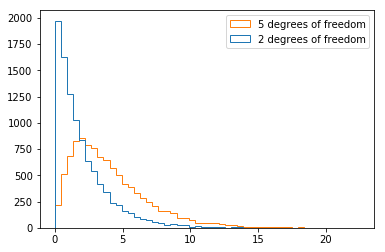

In [56]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [2]:
df = pd.read_csv('grades.csv')

In [4]:
df.tail()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
2310,DE88902E-C7A7-E37A-CFA7-F2C8F2D219F2,77.684611,2016-03-07 02:52:24.378000000,69.916150,2016-03-11 22:02:39.161000000,69.916150,2016-03-17 07:30:09.261000000,69.916150,2016-03-18 18:01:24.525000000,55.932920,2016-03-20 06:38:12.120000000,50.339628,2016-03-25 11:00:06.923000000
2311,DE88902E-C7A7-E37A-CFA7-F2C8F2D219F2,75.367870,2015-11-29 02:43:27.932000000,59.934296,2015-12-03 05:30:39.218000000,48.687437,2015-12-09 15:56:44.895000000,43.008693,2015-12-13 06:18:01.342000000,38.707824,2015-12-20 02:39:39.248000000,38.707824,2015-12-22 13:34:42.931000000
2312,EFDA9F93-D0C3-864F-B0F6-2E9AA3E05E31,73.269463,2015-10-20 08:09:27.418000000,58.255570,2015-11-18 19:07:06.930000000,58.955570,2015-12-10 08:54:54.871000000,52.250013,2015-11-23 19:40:00.434000000,41.800010,2015-11-29 14:23:43.659000000,41.800010,2015-12-04 09:56:07.156000000
2313,1F51E050-78F7-F270-1B90-ED1BC0376763,87.268366,2016-04-03 09:04:51.646000000,87.268366,2016-04-08 19:24:29.095000000,87.268366,2016-04-12 05:43:33.853000000,69.814693,2016-04-14 10:43:58.104000000,55.851754,2016-04-19 05:37:19.322000000,55.851754,2016-04-23 03:44:06.813000000
2314,DDE0526B-7DA4-80E8-C2A6-D097F3826029,80.318105,2015-10-04 09:46:03.403000000,79.818105,2015-10-06 10:28:30.820000000,64.594484,2015-10-13 17:06:29.179000000,50.955587,2015-10-06 16:18:35.513000000,40.764470,2015-10-23 17:03:26.939000000,40.764470,2015-10-26 15:56:55.460000000


In [5]:
len(df)

2315

In [6]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [7]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [8]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [9]:
from scipy import stats
stats.ttest_ind?

In [10]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [12]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [11]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)